In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set2')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel(r"C:\Users\mark7\OneDrive\Documenten\Bachelor Project\Sentences and Topics.xlsx")

In [4]:
df = df.drop('Unnamed: 0', axis=1)

The airline groups are:

Western - United Airlines, American Airlines and British Airways

Chinese - Air China, China Southern Airlines and Cathay Pacific Airways

Mid East- Etihad Airways, Qatar Airways and Emirates


# Adjusting Polarity for Weight

Add new column that is BERT Polarity * Weight and scale it from -1 to 1

In [5]:
df['Adjusted Polarity'] = df['BERT Polarity'] * df['Weight']
df.head()

,Airline,Cabin,Sentence,Weight,VADER Polarity,BERT Polarity,In-Flight Entertainment,Food and Beverages,Cabin Service,Ground Service,Seat Comfort,Other,Adjusted Polarity
0,Turkish Airlines,Economy Class,first time i'd flown tk.,0.1,0.0000,-0.1606,0,0,0,0,0,1,-0.01606
1,Turkish Airlines,Economy Class,"i found them very good in the air, cabin crew,...",0.1,0.7420,0.8166,0,1,1,0,0,0,0.08166
2,Turkish Airlines,Economy Class,"not so great on the ground, ground staff, call...",0.1,-0.5440,-0.3615,0,0,0,1,0,0,-0.03615
3,Turkish Airlines,Economy Class,my flight from lhr was delayed so i missed the...,0.1,-0.5812,-0.5593,0,0,0,0,0,1,-0.05593
4,Turkish Airlines,Economy Class,"most ground staff don't speak english, and i w...",0.1,-0.3400,-0.4428,0,0,0,1,0,0,-0.04428


In [6]:
min_col = min(df['Adjusted Polarity'])
max_col = max(df['Adjusted Polarity'])

def scaling(x):
    return [round(2 * (x - min_col) / (max_col - min_col) - 1, 4) for x in df['Adjusted Polarity']]

In [7]:
df['Adjusted Polarity'] = scaling(df['Adjusted Polarity'])

In [8]:
min(df['Adjusted Polarity'])

-1.0

# 1 Overall

## 1.1 Intergroup Overall Polarity Comparison 

In [9]:
airlines_west = ['United Airlines', 'American Airlines', 'British Airways']

(-1.0, 1.0)

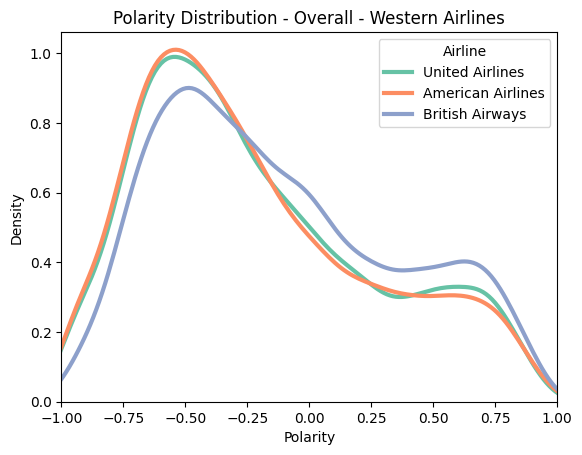

In [10]:
for airline in airlines_west:
    # Subset to the airline
    subset = df[df['Airline'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline')
plt.title('Polarity Distribution - Overall - Western Airlines')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Overall - Western Airlines', dpi=300)

In [11]:
airlines_china = ['Air China', 'China Southern Airlines', 'Cathay Pacific Airways']

(-1.0, 1.0)

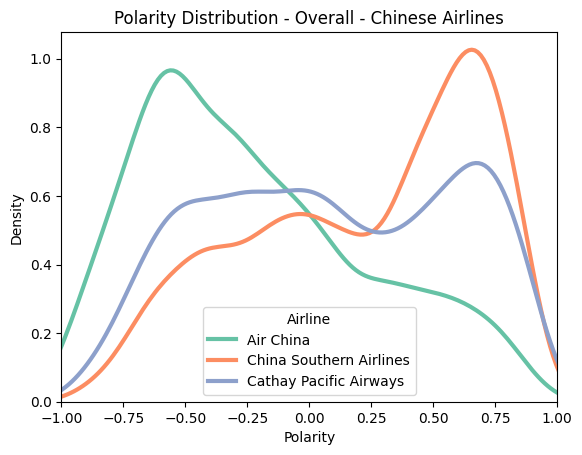

In [12]:
for airline in airlines_china:
    # Subset to the airline
    subset = df[df['Airline'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline')
plt.title('Polarity Distribution - Overall - Chinese Airlines')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Overall - Chinese Airlines', dpi=300)

In [13]:
airlines_mideast = ['Etihad Airways', 'Qatar Airways', 'Emirates']

(-1.0, 1.0)

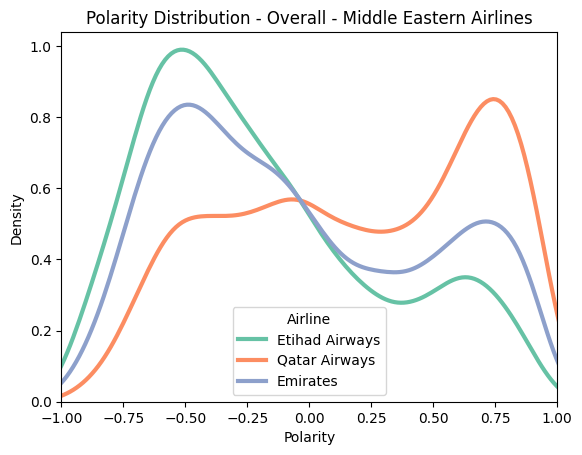

In [14]:
for airline in airlines_mideast:
    # Subset to the airline
    subset = df[df['Airline'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline')
plt.title('Polarity Distribution - Overall - Middle Eastern Airlines')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Overall - Middle Eastern Airlines', dpi=300)

## 1.2 Overall between Groups

In [15]:
airlines = [['United Airlines', 'American Airlines', 'British Airways'], ['Air China', 'China Southern Airlines', 'Cathay Pacific Airways'], ['Etihad Airways', 'Qatar Airways', 'Emirates']]

(-1.0, 1.0)

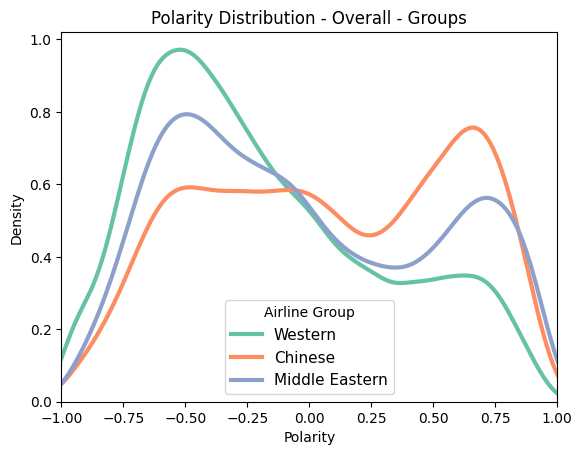

In [16]:
i = 0
for group in airlines:
    # Subset to the airline
    subset = df[df['Airline'].isin(airlines[i])]
    i += 1
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                    kde_kws = {'linewidth': 3},
                    label = group)
    
# Plot formatting
plt.legend(['Western', 'Chinese', 'Middle Eastern'], prop={'size': 11}, title = 'Airline Group')
plt.title('Polarity Distribution - Overall - Groups')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Overall - Groups', dpi=300)

## 1.3 Best of Groups

In [17]:
best_airlines = ['British Airways', 'China Southern Airlines', 'Qatar Airways']

(-1.0, 1.0)

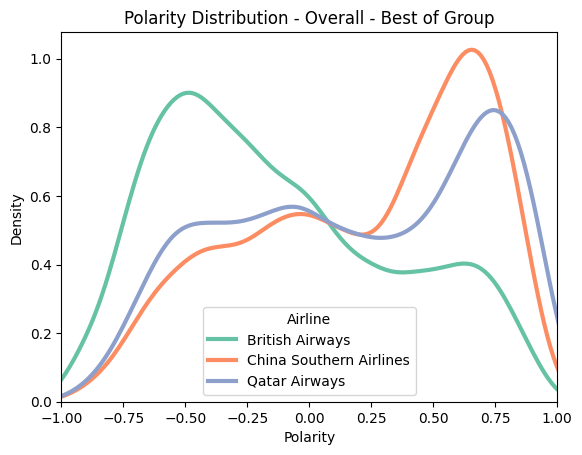

In [18]:
for airline in best_airlines:
    # Subset to the airline
    subset = df[df['Airline'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline')
plt.title('Polarity Distribution - Overall - Best of Group')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Overall - Best of Group', dpi=300)

## 1.4 British vs. Worst of Other Groups

In [19]:
brit_vs_worst = ['British Airways', 'Air China', 'Etihad Airways']

(-1.0, 1.0)

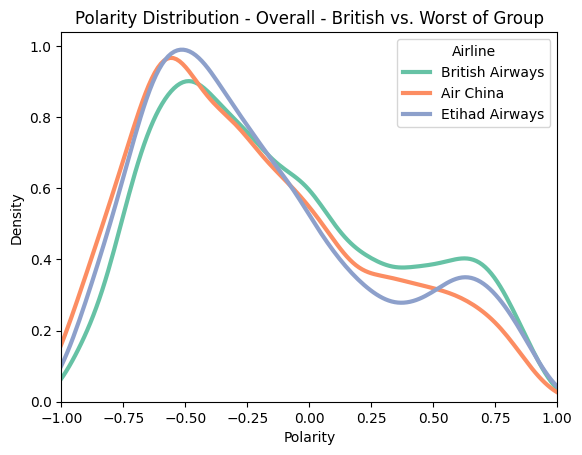

In [20]:
for airline in brit_vs_worst:
    # Subset to the airline
    subset = df[df['Airline'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline')
plt.title('Polarity Distribution - Overall - British vs. Worst of Group')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)


# Saving the figure
#plt.savefig('Overall - British vs. Worst of Group.png', dpi=300)

## 1.5 All Against Each Other

In [21]:
airlines_free = ['United Airlines', 'American Airlines', 'British Airways', 'Air China', 'China Southern Airlines', 'Cathay Pacific Airways', 'Etihad Airways', 'Qatar Airways', 'Emirates']

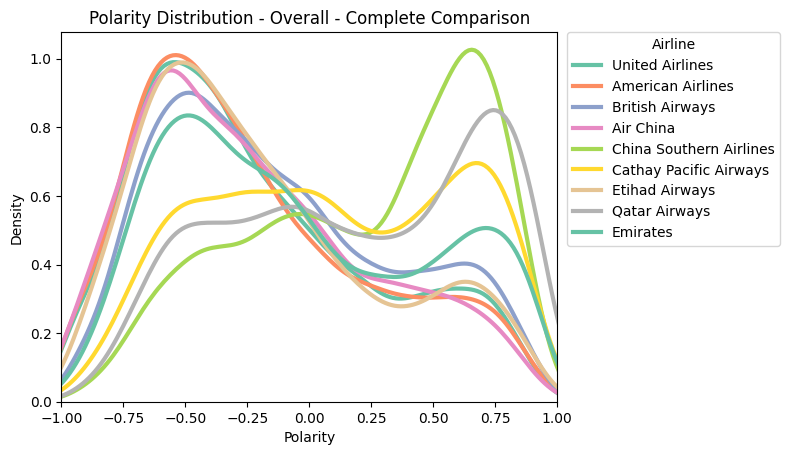

In [22]:
for airline in airlines_free:
    # Subset to the airline
    subset = df[df['Airline'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Polarity Distribution - Overall - Complete Comparison')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Overall - Complete Comparison', dpi=300, bbox_inches='tight')

# 2 In-Flight Entertainment

## 2.1 Intergroup IFE Polarity Comparison

(-1.0, 1.0)

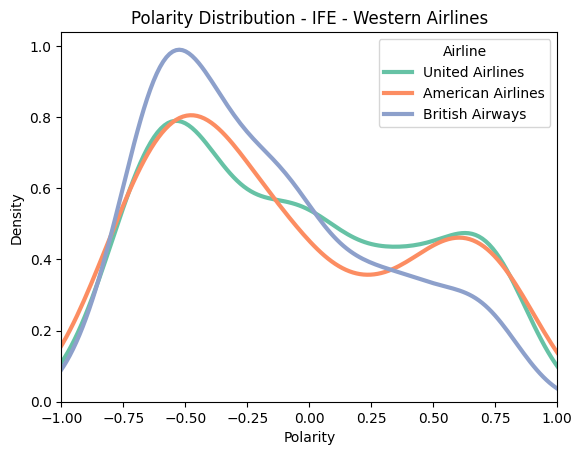

In [23]:
for airline in airlines_west:
    # Subset to the airline
    subset = df[(df['Airline'] == airline) & (df['In-Flight Entertainment'] == 1)]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline')
plt.title('Polarity Distribution - IFE - Western Airlines')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('IFE - Western Airlines', dpi=300)

(-1.0, 1.0)

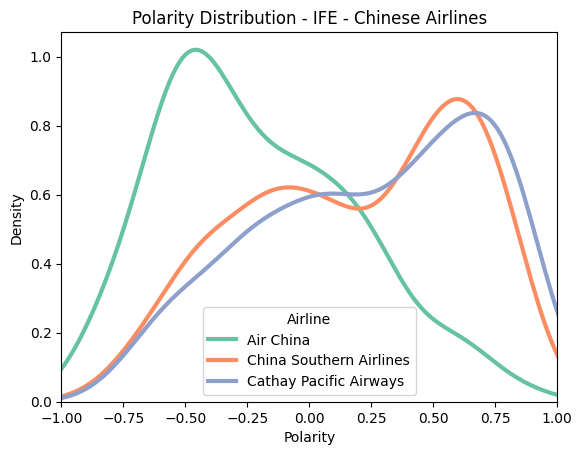

In [24]:
for airline in airlines_china:
    # Subset to the airline
    subset = df[(df['Airline'] == airline) & (df['In-Flight Entertainment'] == 1)]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline')
plt.title('Polarity Distribution - IFE - Chinese Airlines')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('IFE - Chinese Airlines', dpi=300)

(-1.0, 1.0)

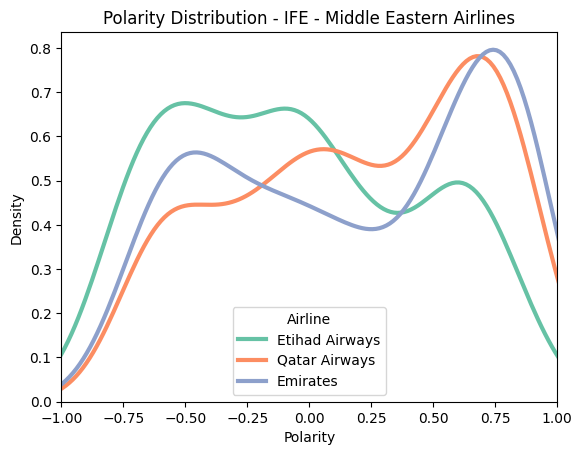

In [25]:
for airline in airlines_mideast:
    # Subset to the airline
    subset = df[(df['Airline'] == airline) & (df['In-Flight Entertainment'] == 1)]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline')
plt.title('Polarity Distribution - IFE - Middle Eastern Airlines')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('IFE - Middle Eastern Airlines', dpi=300)

## 2.2 IFE between Groups

(-1.0, 1.0)

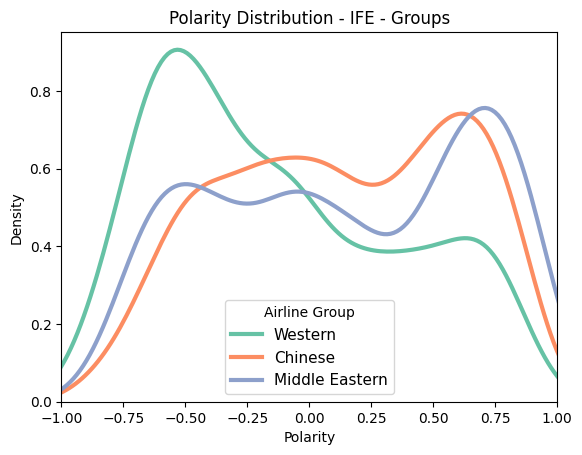

In [26]:
i = 0
for group in airlines:
    # Subset to the airline
    subset = df[(df['Airline'].isin(airlines[i])) & (df['In-Flight Entertainment'] == 1)]
    i += 1
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                    kde_kws = {'linewidth': 3},
                    label = group)
    
# Plot formatting
plt.legend(['Western', 'Chinese', 'Middle Eastern'], prop={'size': 11}, title = 'Airline Group')
plt.title('Polarity Distribution - IFE - Groups')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('IFE - Groups', dpi=300)

## 2.3 All Against Each Other

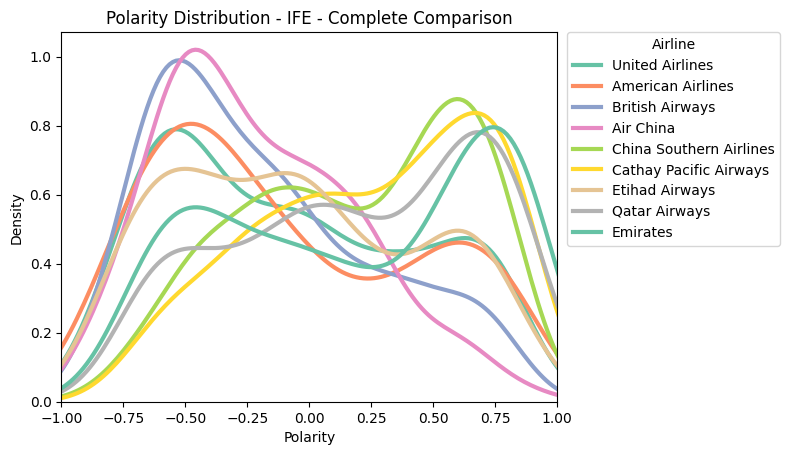

In [27]:
for airline in airlines_free:
    # Subset to the airline
    subset = df[(df['Airline'] == airline) & (df['In-Flight Entertainment'] == 1)]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Polarity Distribution - IFE - Complete Comparison')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('IFE - Complete Comparison', dpi=300, bbox_inches='tight')

# 3 Food and Beverages

## 3.1 Intergroup F&B Polarity Comparison

(-1.0, 1.0)

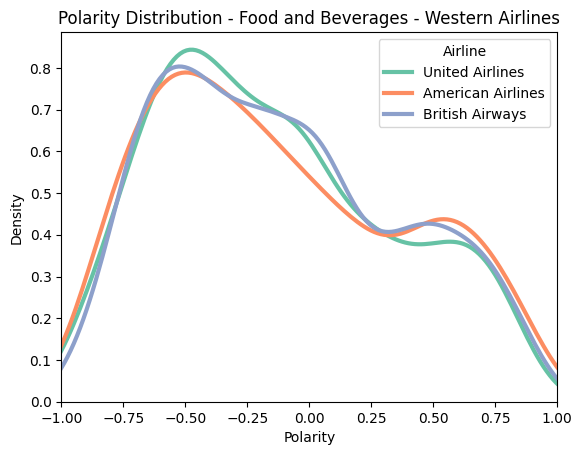

In [28]:
for airline in airlines_west:
    # Subset to the airline
    subset = df[(df['Airline'] == airline) & (df['Food and Beverages'] == 1)]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline')
plt.title('Polarity Distribution - Food and Beverages - Western Airlines')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Food and Beverages - Western Airlines', dpi=300)

(-1.0, 1.0)

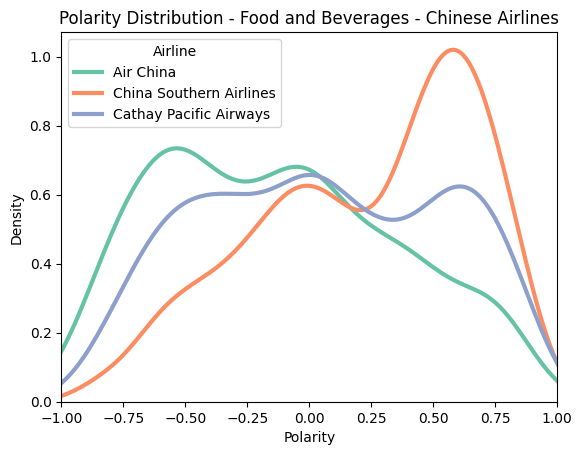

In [29]:
for airline in airlines_china:
    # Subset to the airline
    subset = df[(df['Airline'] == airline) & (df['Food and Beverages'] == 1)]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline')
plt.title('Polarity Distribution - Food and Beverages - Chinese Airlines')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Food and Beverages - Chinese Airlines', dpi=300)

(-1.0, 1.0)

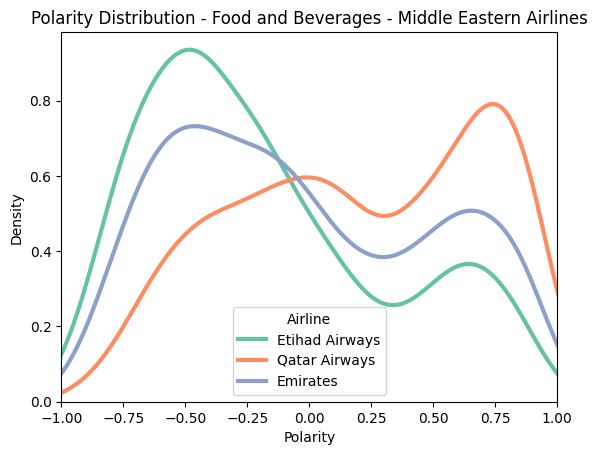

In [30]:
for airline in airlines_mideast:
    # Subset to the airline
    subset = df[(df['Airline'] == airline) & (df['Food and Beverages'] == 1)]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline')
plt.title('Polarity Distribution - Food and Beverages - Middle Eastern Airlines')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Food and Beverages - Middle Eastern Airlines', dpi=300)

Unlike in the overall category, Emirates is not the worst in this topic. Qatar still goated.

## 3.2 Food and Beverages between Groups

(-1.0, 1.0)

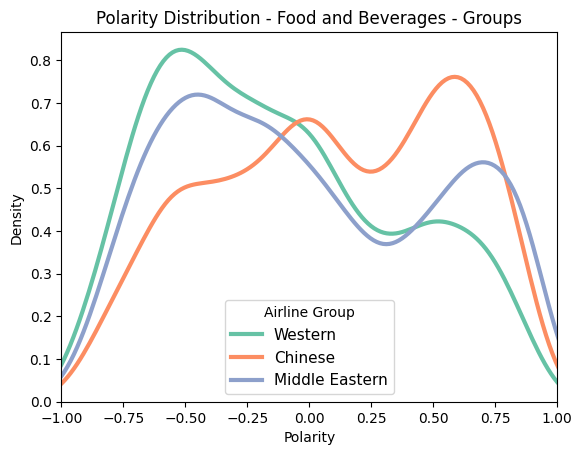

In [31]:
i = 0
for group in airlines:
    # Subset to the airline
    subset = df[(df['Airline'].isin(airlines[i])) & (df['Food and Beverages'] == 1)]
    i += 1
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                    kde_kws = {'linewidth': 3},
                    label = group)
    
# Plot formatting
plt.legend(['Western', 'Chinese', 'Middle Eastern'], prop={'size': 11}, title = 'Airline Group')
plt.title('Polarity Distribution - Food and Beverages - Groups')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Food and Beverages - Groups', dpi=300)

## 3.3 All Against Each Other

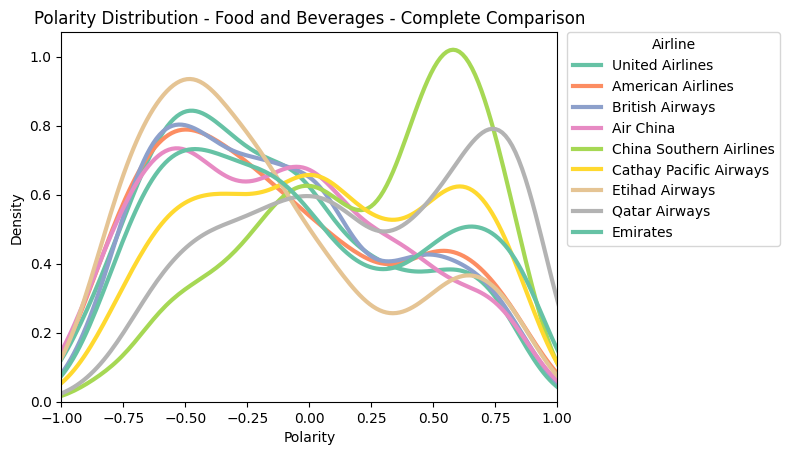

In [32]:
for airline in airlines_free:
    # Subset to the airline
    subset = df[(df['Airline'] == airline) & (df['Food and Beverages'] == 1)]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Polarity Distribution - Food and Beverages - Complete Comparison')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Food and Beverages - Complete Comparison', dpi=300, bbox_inches='tight')

Etihad has terrible food

Interesting here is that Qatar, although being 2nd, has much more 1 polarity reviews than China Southern. The positive reviews tend to be extremely positive. 

Idea: make a graph table with all of these graphs

# 4 Cabin Service

## 4.1 Intergroup Cabin Service Polarity Comparison

(-1.0, 1.0)

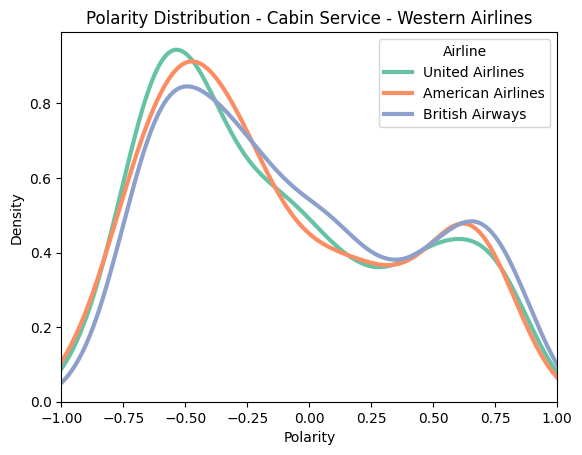

In [33]:
for airline in airlines_west:
    # Subset to the airline
    subset = df[(df['Airline'] == airline) & (df['Cabin Service'] == 1)]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline')
plt.title('Polarity Distribution - Cabin Service - Western Airlines')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Cabin Service - Western Airlines', dpi=300)

(-1.0, 1.0)

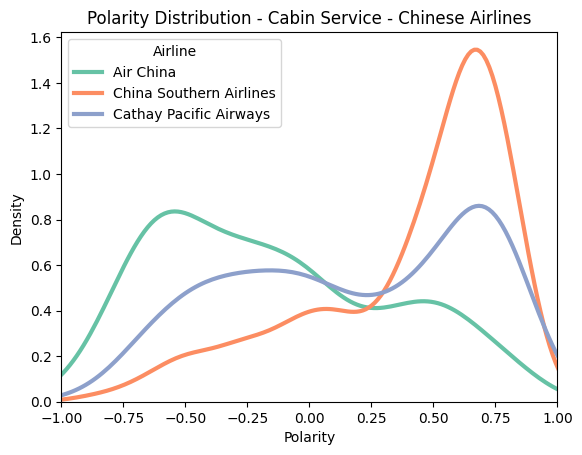

In [34]:
for airline in airlines_china:
    # Subset to the airline
    subset = df[(df['Airline'] == airline) & (df['Cabin Service'] == 1)]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline')
plt.title('Polarity Distribution - Cabin Service - Chinese Airlines')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Cabin Service - Chinese Airlines', dpi=300)

(-1.0, 1.0)

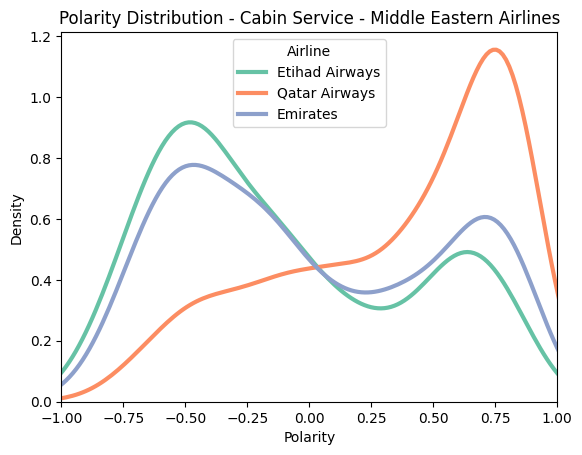

In [35]:
for airline in airlines_mideast:
    # Subset to the airline
    subset = df[(df['Airline'] == airline) & (df['Cabin Service'] == 1)]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline')
plt.title('Polarity Distribution - Cabin Service - Middle Eastern Airlines')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Cabin Service - Middle Eastern Airlines', dpi=300)

## 4.2 Cabin Service between Groups

(-1.0, 1.0)

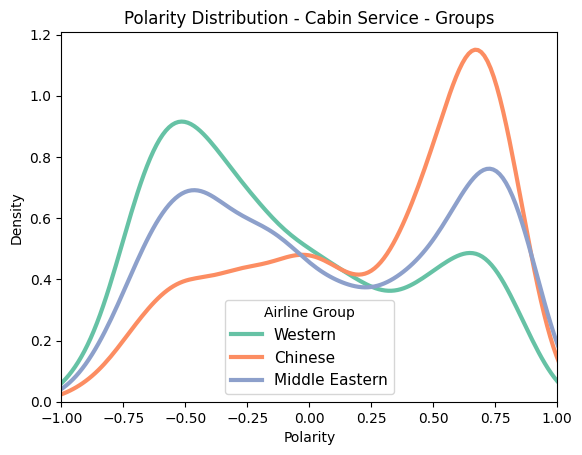

In [36]:
i = 0
for group in airlines:
    # Subset to the airline
    subset = df[(df['Airline'].isin(airlines[i])) & (df['Cabin Service'] == 1)]
    i += 1
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                    kde_kws = {'linewidth': 3},
                    label = group)
    
# Plot formatting
plt.legend(['Western', 'Chinese', 'Middle Eastern'], prop={'size': 11}, title = 'Airline Group')
plt.title('Polarity Distribution - Cabin Service - Groups')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Cabin Service - Groups', dpi=300)

## 4.3 All Against Each Other

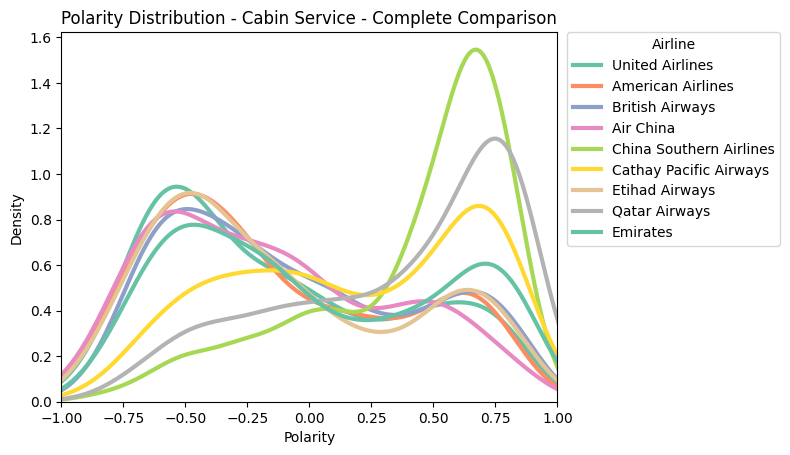

In [37]:
for airline in airlines_free:
    # Subset to the airline
    subset = df[(df['Airline'] == airline) & (df['Cabin Service'] == 1)]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Polarity Distribution - Cabin Service - Complete Comparison')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Cabin Service - Complete Comparison', dpi=300, bbox_inches='tight')

# 5 Ground Service

## 5.1 Intergroup Ground Service Polarity Comparison

(-1.0, 1.0)

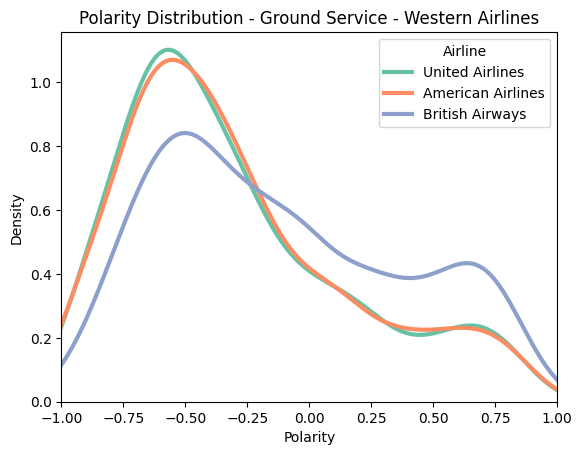

In [38]:
for airline in airlines_west:
    # Subset to the airline
    subset = df[(df['Airline'] == airline) & (df['Ground Service'] == 1)]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline')
plt.title('Polarity Distribution - Ground Service - Western Airlines')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Ground Service - Western Airlines', dpi=300)

British Airways has significantly better ground service than other western airlines

(-1.0, 1.0)

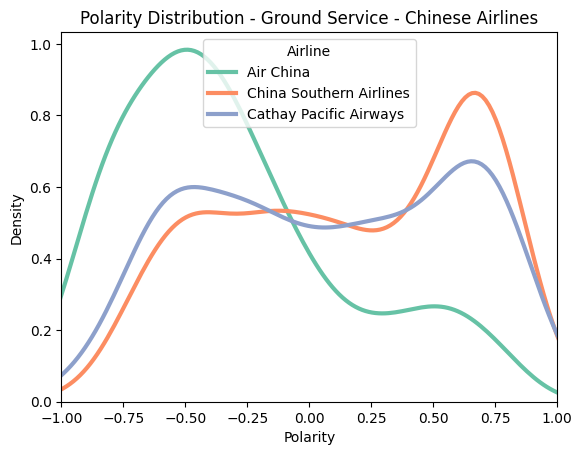

In [39]:
for airline in airlines_china:
    # Subset to the airline
    subset = df[(df['Airline'] == airline) & (df['Ground Service'] == 1)]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline')
plt.title('Polarity Distribution - Ground Service - Chinese Airlines')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Ground Service - Chinese Airlines', dpi=300)

Air China has extremely bad ground service

(-1.0, 1.0)

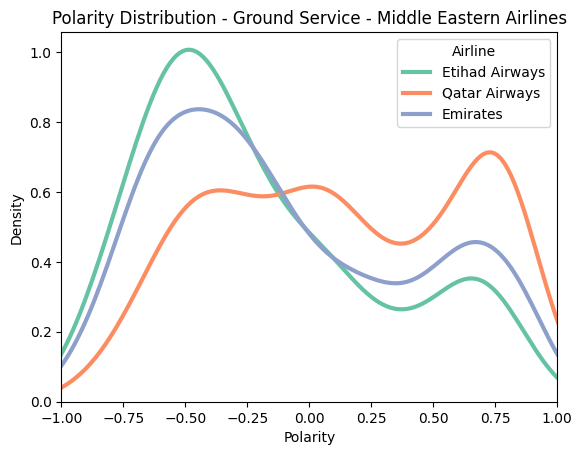

In [40]:
for airline in airlines_mideast:
    # Subset to the airline
    subset = df[(df['Airline'] == airline) & (df['Ground Service'] == 1)]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline')
plt.title('Polarity Distribution - Ground Service - Middle Eastern Airlines')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Ground Service - Middle Eastern Airlines', dpi=300)

## 5.2 Ground Service between Groups

(-1.0, 1.0)

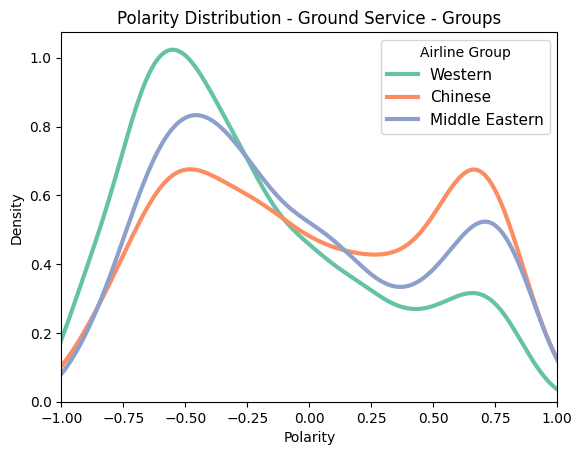

In [41]:
i = 0
for group in airlines:
    # Subset to the airline
    subset = df[(df['Airline'].isin(airlines[i])) & (df['Ground Service'] == 1)]
    i += 1
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                    kde_kws = {'linewidth': 3},
                    label = group)
    
# Plot formatting
plt.legend(['Western', 'Chinese', 'Middle Eastern'], prop={'size': 11}, title = 'Airline Group')
plt.title('Polarity Distribution - Ground Service - Groups')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Ground Service - Groups', dpi=300)

# 5.3 All Against Each Other

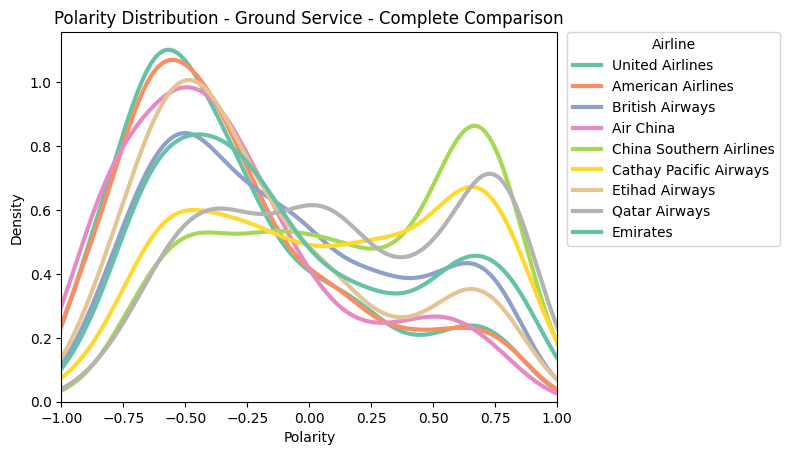

In [42]:
for airline in airlines_free:
    # Subset to the airline
    subset = df[(df['Airline'] == airline) & (df['Ground Service'] == 1)]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Polarity Distribution - Ground Service - Complete Comparison')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Ground Service - Complete Comparison', dpi=300, bbox_inches='tight')

# 6 Seat Comfort

## 6.1 Intergroup Seat Comfort Polarity Comparison

(-1.0, 1.0)

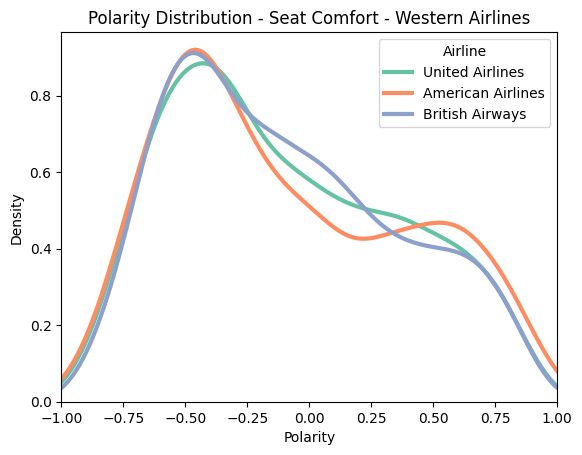

In [43]:
for airline in airlines_west:
    # Subset to the airline
    subset = df[(df['Airline'] == airline) & (df['Seat Comfort'] == 1)]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline')
plt.title('Polarity Distribution - Seat Comfort - Western Airlines')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Seat Comfort - Western Airlines', dpi=300)

(-1.0, 1.0)

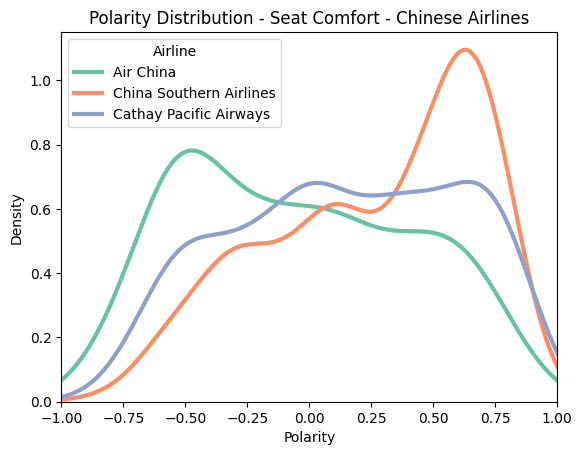

In [44]:
for airline in airlines_china:
    # Subset to the airline
    subset = df[(df['Airline'] == airline) & (df['Seat Comfort'] == 1)]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline')
plt.title('Polarity Distribution - Seat Comfort - Chinese Airlines')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Seat Comfort - Chinese Airlines', dpi=300)

(-1.0, 1.0)

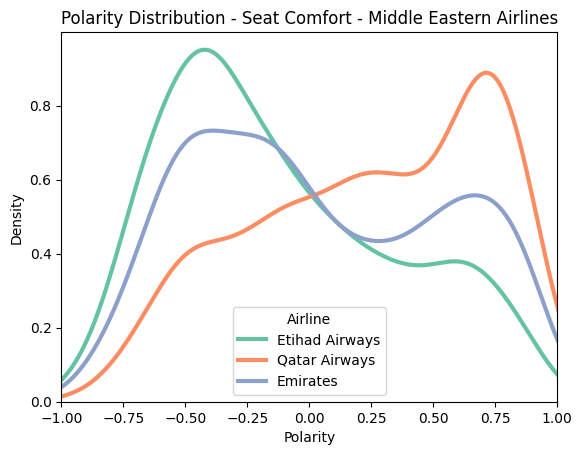

In [45]:
for airline in airlines_mideast:
    # Subset to the airline
    subset = df[(df['Airline'] == airline) & (df['Seat Comfort'] == 1)]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline')
plt.title('Polarity Distribution - Seat Comfort - Middle Eastern Airlines')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Seat Comfort - Middle Eastern Airlines', dpi=300)

## 6.2 Seat Comfort between Groups

(-1.0, 1.0)

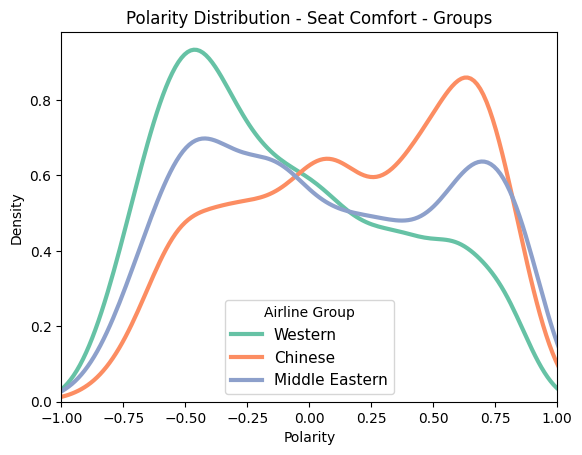

In [46]:
i = 0
for group in airlines:
    # Subset to the airline
    subset = df[(df['Airline'].isin(airlines[i])) & (df['Seat Comfort'] == 1)]
    i += 1
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                    kde_kws = {'linewidth': 3},
                    label = group)
    
# Plot formatting
plt.legend(['Western', 'Chinese', 'Middle Eastern'], prop={'size': 11}, title = 'Airline Group')
plt.title('Polarity Distribution - Seat Comfort - Groups')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Seat Comfort - Groups', dpi=300)

## 6.3 All Against Each Other

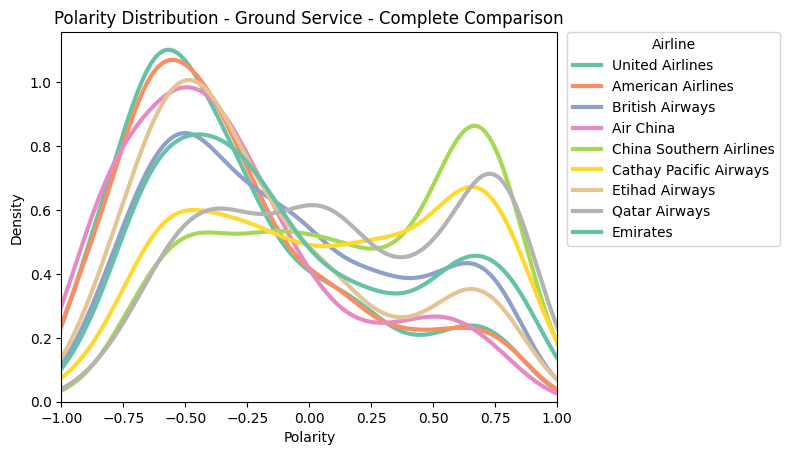

In [47]:
for airline in airlines_free:
    # Subset to the airline
    subset = df[(df['Airline'] == airline) & (df['Ground Service'] == 1)]
    
    # Draw the density plot
    sns.distplot(subset['BERT Polarity'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(title = 'Airline', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Polarity Distribution - Ground Service - Complete Comparison')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.xlim(-1, 1)

# Saving the figure
#plt.savefig('Seat Comfort - Complete Comparison', dpi=300, bbox_inches='tight')